In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
data=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

In [4]:
data=data.iloc[0:6000,:]

In [5]:
data.sample(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3729,4,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,10,27,0,0,0
338,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3084,6,0,0,0,0,0,0,0,28,33,...,0,15,59,74,0,0,0,0,0,0


In [6]:
data.shape

(6000, 785)

Text(0.5, 1.0, 'label = 2')

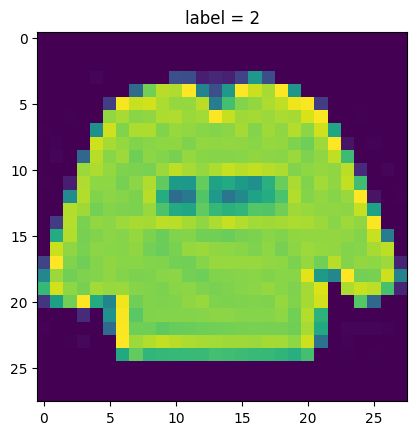

In [7]:
plt.imshow(data.iloc[0,1:].values.reshape(28,28))
plt.title(f"label = {data.iloc[0,0]}")

In [8]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=11)

In [10]:
X_train/=255.0
X_test/=255.0

In [11]:
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
class CustomData(Dataset):
    def __init__(self,X,y):
        self.X=torch.tensor(X.values,dtype=torch.float32)
        self.y=torch.tensor(y.values,dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self,index):
        return self.X[index],self.y[index]

In [13]:
train_data=CustomData(X_train,y_train)

In [14]:
test_data=CustomData(X_test,y_test)

In [15]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


In [16]:
class NeuralNet(nn.Module):
    def __init__(self,num_features):
    
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,X):
        return self.model(X)

In [22]:
model=NeuralNet(X_train.shape[1])
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [23]:
for i in range(100):
    total_loss=0
    for features,label in train_loader:
        y_pred=model(features)
        loss=criterion(y_pred,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()

    avg_loss=total_loss/len(train_data)
    print(f"Epoch : {i} ---- Loss : {avg_loss} ")

Epoch : 0 ---- Loss : 0.035815658745942294 
Epoch : 1 ---- Loss : 0.034455537133746675 
Epoch : 2 ---- Loss : 0.03196729403954965 
Epoch : 3 ---- Loss : 0.027822087230505766 
Epoch : 4 ---- Loss : 0.023445250215353788 
Epoch : 5 ---- Loss : 0.02020428397037365 
Epoch : 6 ---- Loss : 0.017914167752972356 
Epoch : 7 ---- Loss : 0.01625237676832411 
Epoch : 8 ---- Loss : 0.015033473096511983 
Epoch : 9 ---- Loss : 0.014125519383836676 
Epoch : 10 ---- Loss : 0.013429674715907485 
Epoch : 11 ---- Loss : 0.012878059645493826 
Epoch : 12 ---- Loss : 0.012425514448572088 
Epoch : 13 ---- Loss : 0.012042274607552422 
Epoch : 14 ---- Loss : 0.011709294175660169 
Epoch : 15 ---- Loss : 0.01141145306052985 
Epoch : 16 ---- Loss : 0.011140004137048016 
Epoch : 17 ---- Loss : 0.010888700430040006 
Epoch : 18 ---- Loss : 0.010656717226461127 
Epoch : 19 ---- Loss : 0.01044073157840305 
Epoch : 20 ---- Loss : 0.010238187986391561 
Epoch : 21 ---- Loss : 0.010047970607324883 
Epoch : 22 ---- Loss : 0.

In [24]:
model.eval()

NeuralNet(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
with torch.no_grad():

    for features,labels in test_data:
        y_pred=model(features)
        print(y_pred.shape)
        break

torch.Size([10])


In [27]:
correct=0
total=0
with torch.no_grad():

    for features,labels in test_loader:
        y_pred=model(features)
        y_pred.shape
        val,index=torch.max(y_pred,1)
        total+=features.shape[0]
        correct+=(index==labels).sum().item()
print(correct/total)

0.8433333333333334
